# PersonaGraph: Behavioral Fingerprinting using Multi-Source Data Fusion

## 📌 Objective

To simulate behavioral data from multiple digital sources (like social media, browsing history, IoT devices) and build unique behavioral fingerprints for each user by fusing these sources. The goal is to group similar users using clustering techniques and interpret the behavioral patterns for applications like personalization, fraud detection, or recommendation systems.

---

## 📊 Why Synthetic Data?

Since real user behavioral data is sensitive and difficult to access, we simulate realistic datasets representing multiple user interactions across platforms.

---

## 🔧 Tools & Libraries Used

- Python
- Pandas
- NumPy
- Scikit-learn
- Matplotlib / Seaborn
- Jupyter Notebook



## 📦 Data Generation (Synthetic Multi-Source Data)

In this section, we simulate behavioral data from three digital sources:
- **Social Media Activity** (user interactions on social platforms)
- **Browsing History** (time spent on websites)
- **IoT Device Usage** (usage logs of smart devices)

Each dataset will contain a `user_id`, timestamps, and behavior-specific features.

This synthetic data helps us demonstrate data fusion, clustering, and fingerprinting without using real user data.

---


In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import numpy as np

# Reproducibility
np.random.seed(42)

# Sample user IDs
user_ids = [f'user_{i}' for i in range(1, 6)]

# Social Media Activity Data -
social_data = pd.DataFrame({
    'user_id': np.random.choice(user_ids, 20),
    'likes': np.random.randint(0, 50, 20),
    'comments': np.random.randint(0, 30, 20),
    'shares': np.random.randint(0, 10, 20),
    'timestamp': pd.date_range('2025-07-01', periods=20, freq='h')
})

# Browsing History Data 
browsing_data = pd.DataFrame({
    'user_id': np.random.choice(user_ids, 15),
    'site_category': np.random.choice(['news', 'shopping', 'education', 'social', 'entertainment'], 15),
    'time_spent_min': np.round(np.random.uniform(1, 20, 15), 2),
    'timestamp': pd.date_range('2025-07-01', periods=15, freq='2h')
})

# IoT Device Usage Data 
iot_data = pd.DataFrame({
    'user_id': np.random.choice(user_ids, 10),
    'device': np.random.choice(['thermostat', 'smart_light', 'door_lock', 'camera'], 10),
    'usage_duration_min': np.round(np.random.uniform(1, 60, 10), 2),
    'timestamp': pd.date_range('2025-07-01', periods=10, freq='3h')
})


In [3]:
print("Social Media Activity")
display(social_data.head())

Social Media Activity


,user_id,likes,comments,shares,timestamp
0,user_4,21,27,3,2025-07-01 00:00:00
1,user_5,43,13,1,2025-07-01 01:00:00
2,user_3,24,17,7,2025-07-01 02:00:00
3,user_5,48,25,3,2025-07-01 03:00:00
4,user_5,26,8,1,2025-07-01 04:00:00


In [4]:
print("\n Browsing History")
display(browsing_data.head())


 Browsing History


,user_id,site_category,time_spent_min,timestamp
0,user_5,news,12.84,2025-07-01 00:00:00
1,user_2,social,7.29,2025-07-01 02:00:00
2,user_5,education,2.21,2025-07-01 04:00:00
3,user_2,education,6.91,2025-07-01 06:00:00
4,user_1,news,7.18,2025-07-01 08:00:00


In [5]:
print("\n IoT Device Usuage")
display(iot_data.head())



 IoT Device Usuage


,user_id,device,usage_duration_min,timestamp
0,user_1,smart_light,5.54,2025-07-01 00:00:00
1,user_2,thermostat,18.10,2025-07-01 03:00:00
2,user_2,door_lock,10.51,2025-07-01 06:00:00
3,user_4,door_lock,55.85,2025-07-01 09:00:00
4,user_5,thermostat,48.68,2025-07-01 12:00:00


##  Data Cleaning & Preprocessing

### 🎯 Objective
Before we can fuse and analyze the data, we need to clean each dataset. This step involves:

- Checking for missing values
- Ensuring timestamps are in proper datetime format
- Extracting additional time-based features like hour and day of the week

---

### 🧼 Cleaning and Preparing `social_data`


In [6]:
#Checking for missing values
print("Missing values in social_data:\n", social_data.isnull().sum())

Missing values in social_data:
 user_id      0
likes        0
comments     0
shares       0
timestamp    0
dtype: int64


In [7]:
#convert timestamp coulum into datetime
social_data['timestamp'] = pd.to_datetime(social_data['timestamp'])

In [8]:
#extract time-based features
social_data['hours'] = social_data['timestamp'].dt.hour
social_data['dayofweek'] = social_data['timestamp'].dt.day_name()

In [9]:
#preview clean data
display(social_data.head())

,user_id,likes,comments,shares,timestamp,hours,dayofweek
0,user_4,21,27,3,2025-07-01 00:00:00,0,Tuesday
1,user_5,43,13,1,2025-07-01 01:00:00,1,Tuesday
2,user_3,24,17,7,2025-07-01 02:00:00,2,Tuesday
3,user_5,48,25,3,2025-07-01 03:00:00,3,Tuesday
4,user_5,26,8,1,2025-07-01 04:00:00,4,Tuesday


### 🧼 Cleaning and Preparing `browsing_data`


In [10]:
#Checking for missing values
print("Missing values in browsing_data:\n", browsing_data.isnull().sum())

Missing values in browsing_data:
 user_id           0
site_category     0
time_spent_min    0
timestamp         0
dtype: int64


In [11]:
#convert timestamp
browsing_data['timestamp'] = pd.to_datetime(browsing_data['timestamp'])

In [12]:
#extract hours and day of the week 
browsing_data['hour'] = browsing_data['timestamp'].dt.hour
browsing_data['dayofweek'] = browsing_data['timestamp'].dt.day_name()

In [13]:
#preview
display(browsing_data.head())

,user_id,site_category,time_spent_min,timestamp,hour,dayofweek
0,user_5,news,12.84,2025-07-01 00:00:00,0,Tuesday
1,user_2,social,7.29,2025-07-01 02:00:00,2,Tuesday
2,user_5,education,2.21,2025-07-01 04:00:00,4,Tuesday
3,user_2,education,6.91,2025-07-01 06:00:00,6,Tuesday
4,user_1,news,7.18,2025-07-01 08:00:00,8,Tuesday


### 🧼 Cleaning and Preparing `iot_data`


In [14]:
#cleaning the missing values
print("missing value in iot_data:\n", iot_data.isnull().sum())

missing value in iot_data:
 user_id               0
device                0
usage_duration_min    0
timestamp             0
dtype: int64


In [15]:
#convert timestamp
iot_data['timestamp'] = pd.to_datetime(iot_data['timestamp'])

In [16]:
#extract time based features
iot_data['hour'] = iot_data['timestamp'].dt.hour
iot_data['dayofweek'] = iot_data['timestamp'].dt.day_name()

In [17]:
# Preview
display(iot_data.head())

,user_id,device,usage_duration_min,timestamp,hour,dayofweek
0,user_1,smart_light,5.54,2025-07-01 00:00:00,0,Tuesday
1,user_2,thermostat,18.10,2025-07-01 03:00:00,3,Tuesday
2,user_2,door_lock,10.51,2025-07-01 06:00:00,6,Tuesday
3,user_4,door_lock,55.85,2025-07-01 09:00:00,9,Tuesday
4,user_5,thermostat,48.68,2025-07-01 12:00:00,12,Tuesday


✅ **Checkpoint**
At this stage, all datasets are:
 Timestamp-aligned
 Feature-rich with time components
 Cleaned and ready for data fusion


##  Data Fusion – Merging Multi-Source Behavior Data

Now that we have cleaned data from web, app, and social platforms, it's time to fuse them into a single timeline.

We'll:
- Add a `source` column to each dataset to identify origin.
- Concatenate them into a single DataFrame.
- Sort all events chronologically using the `timestamp`.

This fusion allows us to trace users' actions across platforms and analyze their digital footprint holistically.


In [18]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [19]:
import pandas as pd
import numpy as np

# --- Web Activity Dataset ---
web_data = pd.DataFrame({
    'user_id': np.random.choice(['U1', 'U2', 'U3'], size=20),
    'timestamp': pd.date_range('2025-07-01', periods=20, freq='h'),
    'pages_visited': np.random.choice(['Home', 'About', 'Products', 'Blog'], size=20)
})

web_data['hour'] = web_data['timestamp'].dt.hour
web_data['dayofweek'] = web_data['timestamp'].dt.dayofweek

# --- App Activity Dataset ---
app_data = pd.DataFrame({
    'user_id': np.random.choice(['U1', 'U2', 'U3'], size=15),
    'timestamp': pd.date_range('2025-07-01', periods=15, freq='2h'),
    'feature_used': np.random.choice(['Search', 'Filter', 'Upload'], size=15),
    'time_spent_min': np.round(np.random.uniform(1, 20, 15), 2)
})

app_data['hour'] = app_data['timestamp'].dt.hour
app_data['dayofweek'] = app_data['timestamp'].dt.dayofweek

# --- Social Activity Dataset ---
social_data = pd.DataFrame({
    'user_id': np.random.choice(['U1', 'U2', 'U3'], size=10),
    'timestamp': pd.date_range('2025-07-01', periods=10, freq='3h'),
    'activity_type': np.random.choice(['Like', 'Share', 'Comment'], size=10),
    'platform': np.random.choice(['Instagram', 'X', 'LinkedIn'], size=10)
})

social_data['hour'] = social_data['timestamp'].dt.hour
social_data['dayofweek'] = social_data['timestamp'].dt.dayofweek


##  Data Fusion and Behavioral Feature Engineering

In this step, we:
- Combine `web_data`, `app_data`, and `social_data` into a unified dataset.
- Normalize column names to a consistent schema.
- Create a user-level summary (behavioral fingerprint) using aggregated features like activity count, average time spent, most active hour, and dominant platform.


In [20]:
# Add a column to track data source
web_data['source'] = 'web'
app_data['source'] = 'app'
social_data['source'] = 'social'

In [21]:
#normalize column names
web_data = web_data.rename(columns={'page_visited' : 'activity'})
app_data = app_data.rename(columns={'feature_used' : 'activity'})
social_data = social_data.rename(columns={'activity_type' : 'activity'})

#combing all datasets 
combined_data = pd.concat([web_data, app_data, social_data], ignore_index = True)

In [22]:
#preview combined data 
display(combined_data.head())

,user_id,timestamp,pages_visited,hour,dayofweek,source,activity,time_spent_min,platform
0,U3,2025-07-01 00:00:00,Home,0,1,web,NaN,NaN,NaN
1,U2,2025-07-01 01:00:00,Home,1,1,web,NaN,NaN,NaN
2,U3,2025-07-01 02:00:00,Products,2,1,web,NaN,NaN,NaN
3,U1,2025-07-01 03:00:00,About,3,1,web,NaN,NaN,NaN
4,U3,2025-07-01 04:00:00,Blog,4,1,web,NaN,NaN,NaN


In [23]:
# Feature engineering: summarize user activity
#Total number of activities per user 
activity_count = combined_data.groupby('user_id').size().rename('total_activity_count')

In [24]:
#Average hour of activity 
avg_active_hour = combined_data.groupby('user_id')['hour'].mean().rename('avg_active_hour')

In [25]:
#most frequent day of activity
most_active_day = combined_data.groupby('user_id')['dayofweek'].agg(lambda x: x.mode()[0]).rename('most_active_day')

In [26]:
#source diveristy
source_diversity = combined_data.groupby('user_id')['source'].nunique().rename('source_diversity')

In [27]:
#combine all into a fingerprint
behavioral_fingerprint = pd.concat([activity_count, avg_active_hour, most_active_day, source_diversity], axis=1)


In [28]:
#show fingerprint
display(behavioral_fingerprint)

,total_activity_count,avg_active_hour,most_active_day,source_diversity
user_id,,,,
U1,19,10.421053,1,3
U2,12,8.833333,1,3
U3,14,7.928571,1,3


##  Clustering Users Based on Behavioral Fingerprint

To categorize users into behavioral segments, we apply **K-Means Clustering** on the behavioral fingerprint features. This allows us to group users with similar activity levels, time preferences, source diversity, etc.

Before clustering, we standardize the data to ensure all features contribute equally.

We visualize clusters using pair plots and interpret their characteristics.


In [29]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#Drop non-numeric column
X = behavioral_fingerprint.drop(columns=["most_active_day"])

In [38]:
#standarize the feature 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
#Apply KMean clustering
kmeans = KMeans(n_clusters=3, random_state=42)
behavioral_fingerprint['cluster'] = kmeans.fit_predict(X_scaled)

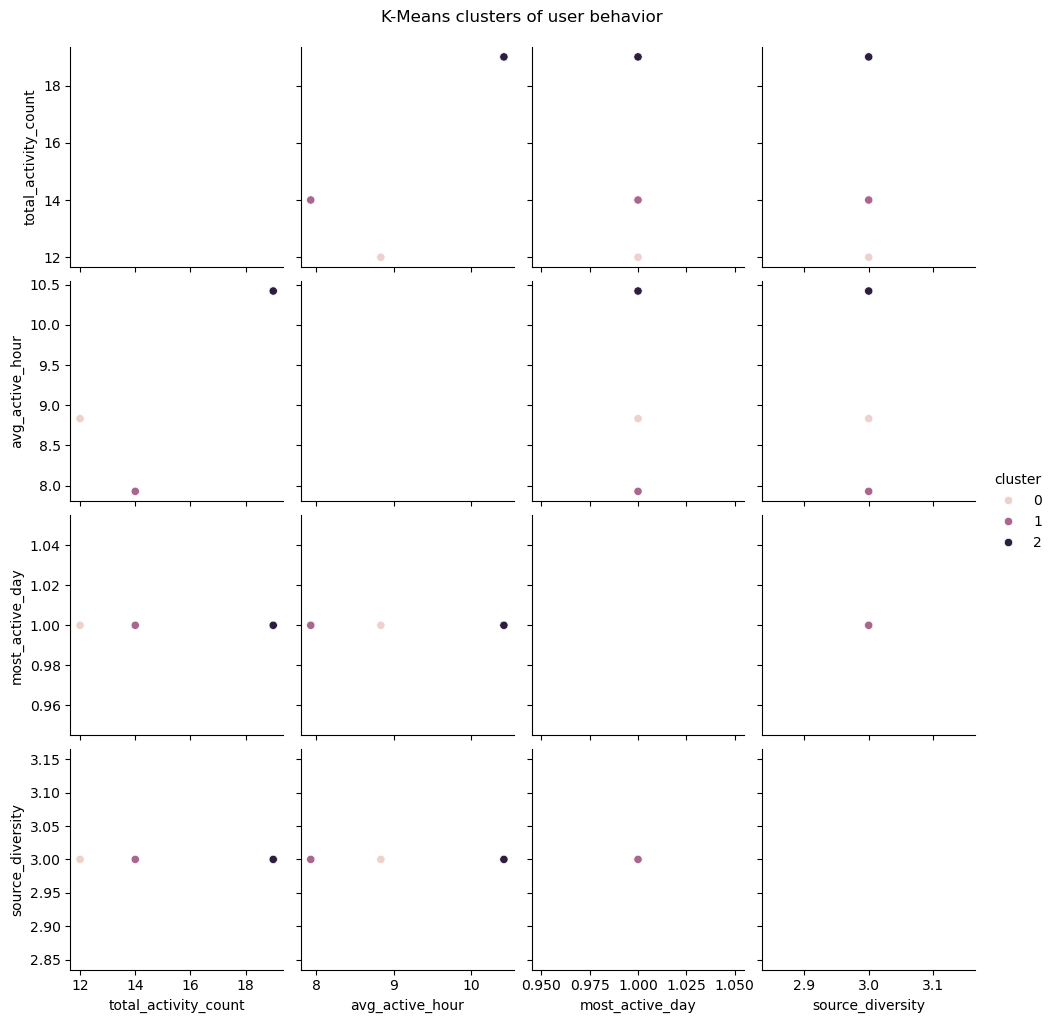

In [40]:
#visualize cluster 
sns.pairplot(behavioral_fingerprint.reset_index(), hue='cluster', diag_kind='kde')
plt.suptitle('K-Means clusters of user behavior', y=1.02)
plt.show()

In [41]:
#Merge behavioral features and cluster labels
PersonaGraph = behavioral_fingerprint.copy()

In [42]:
# Optional: reset index to make 'user_id' a column
PersonaGraph = PersonaGraph.reset_index()

In [43]:
#preview final personagraph 
PersonaGraph.head()

,user_id,total_activity_count,avg_active_hour,most_active_day,source_diversity,cluster
0,U1,19,10.421053,1,3,2
1,U2,12,8.833333,1,3,0
2,U3,14,7.928571,1,3,1
